In [2]:
import pandas as pd
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.1


In [3]:
pip list

Package                       Version
----------------------------- ------------
absl-py                       2.0.0
aiohttp                       3.8.6
aiosignal                     1.3.1
alabaster                     0.7.13
anyio                         4.0.0
argon2-cffi                   23.1.0
argon2-cffi-bindings          21.2.0
arrow                         1.3.0
astroid                       2.11.6
astropy                       5.3.4
asttokens                     2.4.1
astunparse                    1.6.3
async-lru                     2.0.4
async-timeout                 4.0.3
atomicwrites                  1.4.1
attrs                         23.1.0
autopep8                      2.0.4
autovizwidget                 0.21.0
awscli                        1.32.32
Babel                         2.13.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.5
beautifulsoup4                4.12.2
binaryornot                   0.4.4
bitarray                      2.8.2
black    

Note: you may need to restart the kernel to use updated packages.


In [4]:

import pandas as pd

url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
#df = pd.read_csv(url, index_col=0)
medical_df = pd.read_csv(url, sep=',', encoding='utf-8', on_bad_lines='skip', quotechar='"')
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

Here we try to plot data in order to visualize the disbribution via histogram or box plot etc

In [10]:
fig=px.histogram(medical_df,x='age',marginal='box', nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig=px.histogram(medical_df,x='smoker',marginal='box', nbins=47, color_discrete_sequence=['red'], title='Distribution of bmi')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig=px.histogram(medical_df,x='charges',marginal='box', nbins=47, color='smoker', color_discrete_sequence=['green','gray'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [17]:
medical_df.count()['smoker']

1338

In [18]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
fig=px.scatter(medical_df,
              x='age',
              y='charges',
              color='smoker',
              opacity=0.8,
              hover_data=['sex'],
              title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [20]:
px.violin(medical_df, x='children', y='charges')

In [22]:
smoker_values={'no':0, 'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984782

In [32]:
sex_values={'male':0, 'female':1}
sex_numeric=medical_df.sex.map(sex_values)
df_temp = pd.DataFrame()
df_temp['smoker']=smoker_numeric
df_temp['sex']=sex_numeric
df_temp.smoker.corr(df_temp.sex)

-0.0761848169210952

In [35]:
medical_df.age.corr(medical_df.bmi)

0.10927188154853508

/tmp/ipykernel_4373/1125537433.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix')

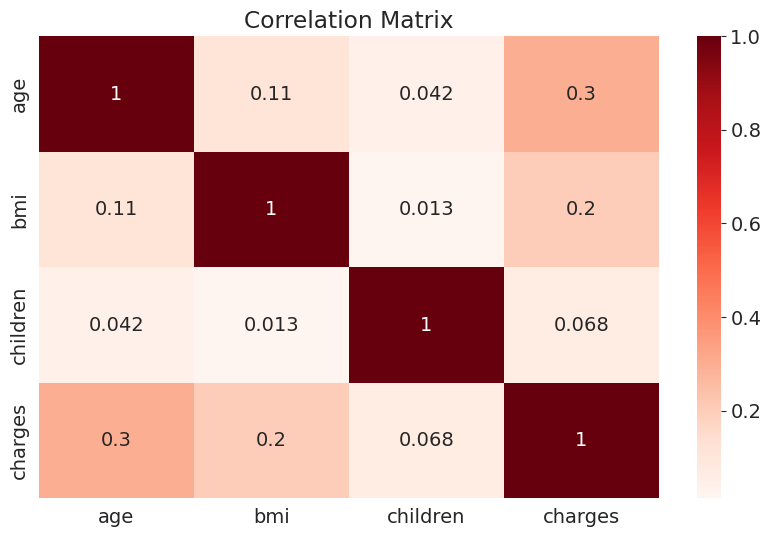

In [36]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [39]:
!pip install jovian --upgrade
import jovian
jovian.commit(filename='sagemaker_instance1.ipynb')

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.com/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.com/greencomputinguae/sagemaker-instance1


'https://jovian.com/greencomputinguae/sagemaker-instance1'

In [40]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
inputs = medical_df[['age']]
targets = medical_df['charges']
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1338, 1)
targes.shape : (1338,)


In [63]:
#non_smoker_df = medical_df[medical_df.smoker == 'no']
#targets = non_smoker_df['charges']
#inputs = non_smoker_df[['age']]


In [67]:

model.fit(inputs, targets)

LinearRegression()

In [72]:
predication= model.predict(inputs)
rmse(targets,inputs)

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



age    NaN
0      NaN
1      NaN
2      NaN
3      NaN
        ..
1333   NaN
1334   NaN
1335   NaN
1336   NaN
1337   NaN
Length: 1339, dtype: float64

In [73]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [74]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247
